In [62]:
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
df3 = pd.read_excel("Defective_Equipment .xlsx")

In [64]:
df3

,Seq,V1,V2,V3,V4,V5,V6,V7,V8
0,1,375,475,135,458,509,469,336,492
1,2,57,73,47,53,63,63,62,58
2,3,245,227,267,242,271,268,219,286
3,4,1472,1582,1494,1462,1613,1490,1323,1493
4,5,105,103,66,103,118,101,98,118
5,6,54,64,41,62,55,63,59,59
6,7,193,235,209,184,207,223,172,156
7,8,147,160,93,122,139,152,130,101
8,9,1102,1137,674,957,1058,1098,990,878
9,10,720,874,1033,566,628,706,646,320


In [65]:
df3.drop(columns=['Seq'], axis=1, inplace=True)

In [66]:
df3.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
V1,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
V2,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
V3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139
V4,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
V5,509,63,271,1613,118,55,207,139,1058,628,193,830,465,247,376,1734,167
V6,469,63,268,1490,101,63,223,152,1098,706,247,699,467,209,363,1597,164
V7,336,62,219,1323,98,59,172,130,990,646,226,615,437,176,322,1235,138
V8,492,58,286,1493,118,59,156,101,878,320,99,777,313,204,348,1684,170


In [67]:
# Calcular média e desvio padrão para cada sensor
mean_values = df3.mean()
std_values = df3.std()


In [68]:
# Identificar sensores com valores fora do intervalo média ± 2 * desvio padrão
sensores_com_defeito = (df3.loc[:, 'V1': 'V8'] > mean_values + 2 * std_values) | (df3.loc[:, 'V1': 'V8'] > mean_values - 2 * std_values)

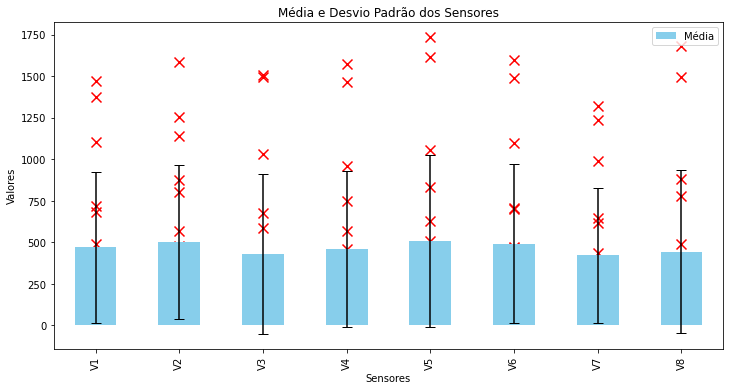

In [81]:
# Plotar gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

mean_values.plot(kind='bar', yerr=std_values, capsize=5, color='skyblue', ax=ax, label='Média')
ax.set_title('Média e Desvio Padrão dos Sensores')
ax.set_xlabel('Sensores')
ax.set_ylabel('Valores')
ax.legend()
# Adicionar marcadores para sensores com defeito
for sensor, defeito in sensores_com_defeito.iteritems():
    for i, is_defeito in enumerate(defeito):
        if is_defeito:
            ax.scatter(sensor, df3.iloc[i][sensor], color='red', marker='x', s=100, label='Defeito' if sensor == 'V1' else '')

plt.show()

In [71]:
# Criar lista de sensores com defeito
sensores_com_defeito_list = sensores_com_defeito.any().index[sensores_com_defeito.any()]

In [72]:
# Imprimir a lista de sensores com defeito
print("Sensores com defeito:", list(sensores_com_defeito_list))


Sensores com defeito: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']


In [73]:
# Calcular a diferença em termos de desvios padrão para cada valor do sensor
diferenca_em_desvios = (df3.loc[:, 'V1':'V8'] - mean_values) / std_values

In [74]:
# Identificar sensor e equipamento com o maior defeito
sensor_max_defeito = diferenca_em_desvios.idxmax(axis=1)
equipamento_max_defeito = diferenca_em_desvios.idxmax()


In [75]:
# Mostrar o sensor e equipamento com o maior defeito
print(f"Sensor com maior defeito em cada equipamento:")
print(sensor_max_defeito)


Sensor com maior defeito em cada equipamento:
0     V8
1     V8
2     V8
3     V2
4     V8
5     V8
6     V3
7     V8
8     V7
9     V3
10    V1
11    V8
12    V2
13    V8
14    V8
15    V8
16    V8
dtype: object


In [76]:
print("\nEquipamento com o maior defeito em cada sensor:")
print(equipamento_max_defeito)


Equipamento com o maior defeito em cada sensor:
V1     3
V2     3
V3    15
V4    15
V5    15
V6    15
V7     3
V8    15
dtype: int64


In [77]:
# Calcular a diferença em termos de desvios padrão para cada valor do sensor
diferenca_em_desvios = (df3.loc[:, 'V1':'V8'] - mean_values) / std_values


In [78]:
# Calcular a média da diferença absoluta para cada equipamento
media_diferenca_absoluta_por_equipamento = diferenca_em_desvios.abs().mean(axis=1)


In [79]:
# Identificar o equipamento com o maior defeito
equipamento_max_defeito = media_diferenca_absoluta_por_equipamento.idxmax()

print(f"Equipamento com o maior defeito: {equipamento_max_defeito}")

Equipamento com o maior defeito: 3
